# Precipitation exercises
***

## <font color=steelblue>Exercise 4 - Hypsometric method

<font color=steelblue>Given the hypsometric curve (area-elevation relation) for a catchment, and rainfall data for several gages within it (file *RainfallData_Exercise_004.xlsx*), compute the average annual precipitation for the basin using the hypsometric method.<tfont>

| **Elevation Range (m)** | **Fraction of Area within Range** |
|-------------------------|-----------------------------------|
| 350                     | 0.028                             |
| 500                     | 0.159                             |
| 700                     | 0.341                             |
| 900                     | 0.271                             |
| 1100                    | 0.151                             |
| 1300                    | 0.042                             |
| 1500                    | 0.008                             |

In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')

#from scipy.stats import genextreme
#from scipy.optimize import curve_fit

__Hypsometric curve__<br>

The hypsometric curve defines the percentage of the area of a catchment that lies below a given altitude. In this exercise, we'll use the hypsometric curve to calculate the proportion of the catchment area at different altitude bands.

In [2]:
# import data from the hypsometric curve
hypso = pd.read_csv('../data/HypsometricCurve.csv')
# simplify column names
hypso.columns = ['Z', 'A']
hypso

Z      A
0   350  0.028
1   500  0.159
2   700  0.341
3   900  0.271
4  1100  0.151
5  1300  0.042
6  1500  0.008

In [3]:
# cumulative area
hypso['Aac'] = hypso.A.cumsum()
hypso

Z      A    Aac
0   350  0.028  0.028
1   500  0.159  0.187
2   700  0.341  0.528
3   900  0.271  0.799
4  1100  0.151  0.950
5  1300  0.042  0.992
6  1500  0.008  1.000

In [4]:
hypso.Z.iloc[-1]

1500

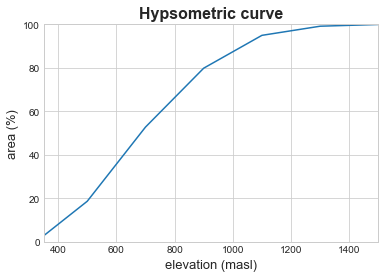

In [5]:
# plot the hypsometric curve
plt.plot(hypso.Z, hypso.Aac * 100)
plt.title('Hypsometric curve', fontsize=16, weight='bold')
plt.xlabel('elevation (masl)', fontsize=13)
plt.xlim(hypso.Z.min(), hypso.Z.max())
plt.ylabel('area (%)', fontsize=13)
plt.ylim((0, 100));

# guardar la figura
plt.savefig('../output/Ex4_hypsometric curve.png', dpi=300)

__Linear regressión precipitation-altitude__<br>

We will use the precipitation data to calculate the linear dependence of precipitation on altitude. This regression follows the equation:

$$P = a·Z+b$$

Where $P$ is mean annual precipitation (mm) at a point with altitude $Z$ (m.a.s.l).

In [6]:
# Import precipitation data
data4 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_004',
                      index_col='Gage')
# simplify column names
data4.columns = ['Z', 'P']
data4

Z     P
Gage            
1      442  1392
2      548  1246
3      736  1495
4      770  1698
5      852  1717
6     1031  1752

In [7]:
# fit the linear regression
(a, b) = np.polyfit(data4.Z, data4.P, deg=1)
print('P = {0:.3f} Z + {1:.3f}'.format(a, b))

P = 0.841 Z + 936.550


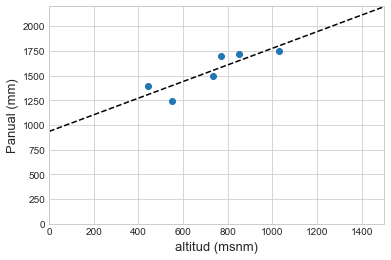

In [8]:
# plot the regression between elevation and annual precipitation
plt.scatter(data4.Z, data4.P)
# recta de regresión
xlim = np.array([0, hypso.Z.max()])
plt.plot(xlim, a * xlim + b, 'k--')
# configuración
plt.title('', fontsize=16, weight='bold')
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(xlim)
plt.ylabel('Panual (mm)', fontsize=13)
plt.ylim(0, 2200);

# guardar la figura
plt.savefig('../output/Ex4_linear regression Z-Pannual.png', dpi=300)

__Areal precipitation__

We will use the above linear regression to estimate the mean annual precipitation for each of the altitude bands. Areal precipitation is the weighted mean of these precipitation values, where the weights are the percentages of the catchment area belonging to the elevation bands.

In [9]:
hypso['P'] = a * hypso.Z + b
hypso

Z      A    Aac            P
0   350  0.028  0.028  1230.736833
1   500  0.159  0.187  1356.817066
2   700  0.341  0.528  1524.924043
3   900  0.271  0.799  1693.031019
4  1100  0.151  0.950  1861.137996
5  1300  0.042  0.992  2029.244973
6  1500  0.008  1.000  2197.351949

The areal precipitation is the sum of the summation of the product of weight (_A_, fraction of catchment area) by the interpolated precipitation (_P_). 

In [10]:
Pareal = np.sum(hypso.A * hypso.P)

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal))

The mean annual precipitation in the catchment is 1612.8 mm


All the previous steps could be done in a shorter way:

In [11]:
p = np.polyfit(data4.Z,  data4.P, deg=1) # fit the linear regression
Ps = np.polyval(p, hypso.Z)                   # interpolate precipitation
Pareal = np.sum(Ps * hypso.A)                 # areal precipitation

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal))

The mean annual precipitation in the catchment is 1612.8 mm


If we had calculated the areal precipitation by the station-average method (see exercise 1), we would've underestimated the areal precipitation in the catchment.

In [12]:
Pareal2 = data4.P.mean()

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal2))

The mean annual precipitation in the catchment is 1550.0 mm
